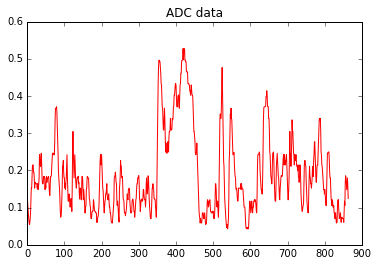

0.47123668981481426


In [16]:
%matplotlib inline
from pynq.pmods import PMOD_ADC
import time
import matplotlib.pyplot as plt
from pynq.pl import Overlay
Overlay("pmod.bit").download()

# initialize ADC on PMOD 1 (JB).
# The ADC DA4 has 4 input channels at 12 bit resolution, however only the first 3: 
# V1, V2 and V3 (form 0 to 2) can be used.
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
pmod_adc = PMOD_ADC(4)

# read the tension value for V1 (V1 -> 0) and print it
value = pmod_adc.read(0)


# start logging on V3 (V3 -> 2) with log interval of 10 ms
# NOTE: the current driver allows to log only one input at a time,
# to get data from multiple inputs at the same time you need to get them manually within a loop
pmod_adc.start_log(0, 10)

#acquisition time
time.sleep(10)

# get and stop logging
val = pmod_adc.get_log()

# draw graph
plt.plot(range(len(val)), val, 'r')
plt.title('ADC data')
plt.show()

# noise threshold
#ambient noise average
noise=2.5*(sum(val)/len(val))
print(noise)

In [22]:
#libaries import
from pynq.pmods import Grove_DLight
from pynq.pmods import PMOD_ADC
from pynq.pmods import Grove_IMU
from pynq.pmods import PMOD_IO
import numpy as np
from pynq.pl import Overlay
Overlay("pmod.bit").download()

#initialize Led on PMOD 2
rosso=PMOD_IO(2,0, 'out')

# initialize grove digital light sensor on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
dl = Grove_DLight(1,4)

# initialize ADC on PMOD 4 (JB).
# The ADC DA4 has 4 input channels at 12 bit resolution, however only the first 3: 
# V1, V2 and V3 (form 0 to 2) can be used.
pmod_adc = PMOD_ADC(4)
value = pmod_adc.read(0)

# initialize Grove IMU on PMOD 3 (JB) and grove id 4 (GR4).
# NOTE: only GR4 can be used for the Grove IMU
imu = Grove_IMU(3,4)

# generate an empty list of values for Light Sensor
values = []

#


#this program is running until the stop button is clicked
while(1):
    try:
        #Light values reading
        while(len(values)<150):
            value = dl.read_raw_light()
            values.append(value[0])
            end = time.time()
        
        avg_light=sum(values)/len(values)
        values=[]
        print(avg_light)
        
        #definition of light threshold (if it's dark the soft toy is active, otherwise not)
        i=0
        while(avg_light<7 and i<50):
            #function calls
            loud=loudness()
            acc=accelerometer()
            i=i+1
            
            print(acc)
            print(loud)
            
            #definition of loudness and acceleration thresholds
            if loud>noise:
                print("acceso per rumore")
                rosso.write(1)
                time.sleep(7)
            
            elif np.sqrt((acc[0])**2+(acc[1])**2+(acc[2])**2)>2:
                print("acceso per accelerazione")
                rosso.write(1)
            else:
                rosso.write(0)
                
            
            
                
            

        rosso.write(0)    
    

    except KeyboardInterrupt:
        # exit without showing errors if the stop button in Jupyter is pressed
        rosso.write(0)
        break
        


        
        
print(values)

print(len(values))

0.8533333333333334
fine entrati
[0.21, 0.98, 0.07]
0.08597727272727274
fine entrati
[0.21, 0.98, 0.07]
0.07786363636363637
fine entrati
[0.21, 0.98, 0.07]
0.15033863636363642
fine entrati
[0.21, 0.98, 0.06]
0.5515386363636362
acceso per rumore
fine entrati
[0.21, 0.99, 0.07]
0.09546136363636362
fine entrati
[0.21, 0.98, 0.07]
0.0778340909090909
fine entrati
[0.21, 0.98, 0.06]
0.11546136363636363
fine entrati
[0.21, 0.99, 0.07]
0.09872499999999997
fine entrati
[0.21, 0.98, 0.06]
0.07378636363636365
fine entrati
[0.21, 0.99, 0.07]
0.06700454545454548
fine entrati
[0.21, 0.98, 0.06]
0.06672045454545456
fine entrati
[0.21, 0.98, 0.07]
0.10010227272727272
fine entrati
[0.0, 1.42, 0.37]
0.09265227272727272
fine entrati
[-0.22, -2.0, 2.0]
0.10529090909090912
acceso per accelerazione
fine entrati
[-0.67, -0.01, 2.0]
0.08053181818181819
acceso per accelerazione
fine entrati
[0.42, 1.25, 0.72]
0.06451590909090911
fine entrati
[0.58, 1.18, 0.12]
0.08137954545454547
fine entrati
[-2.0, 0.9, 1.92]


In [3]:
from pynq.pmods import PMOD_IO
rosso=PMOD_IO(2,0, 'out')
        
        
def loudness():
    
    print("fine entrati")
    # read the tension value for V1 (V1 -> 0) and print it
    value = pmod_adc.read(0)
   
    # start logging on V3 (V3 -> 2) with log interval of 10 ms
    # NOTE: the current driver allows to log only one input at a time,
    # to get data from multiple inputs at the same time you need to get them manually within a loop
    pmod_adc.start_log(0, 10)

    # wait for 1  second...    
    time.sleep(0.5)

    # get and stop logging
    values = pmod_adc.get_log()

    
    #media mobile dei valori rilevati dal loudness sensor
    #y=[]
    #m=0
    #for i in range(len(values)-5):
        #m=sum(values[i:i+5])
        #mediasu5=m/5
        #y.append(float(round(mediasu5,2)))
    meanval=sum(values)/len(values)    

    return meanval

def accelerometer():
    
    # get data from accelerometer
    accl = imu.get_accl()
    
    return accl